In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

df=pd.read_csv("/content/Health_Sleep_Statistics.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB
None
User ID                    0
Age                        0
Gender                     0
Sleep Qualit

# **EDA**

In [2]:
print(df.describe())


          User ID         Age  Sleep Quality   Daily Steps  Calories Burned
count  100.000000  100.000000     100.000000    100.000000        100.00000
mean    50.500000   36.010000       7.000000   6830.000000       2421.00000
std     29.011492    8.454865       1.734964   2498.706736        281.06759
min      1.000000   22.000000       4.000000   3000.000000       2000.00000
25%     25.750000   28.750000       5.750000   4750.000000       2175.00000
50%     50.500000   35.000000       7.500000   6750.000000       2400.00000
75%     75.250000   44.000000       8.250000   9000.000000       2700.00000
max    100.000000   50.000000       9.000000  11000.000000       2900.00000


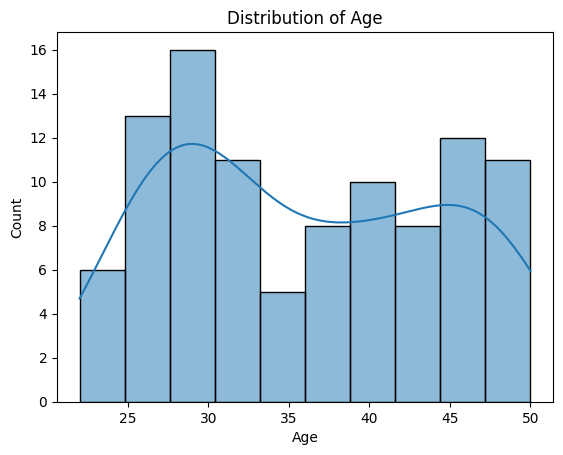

In [3]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.show()


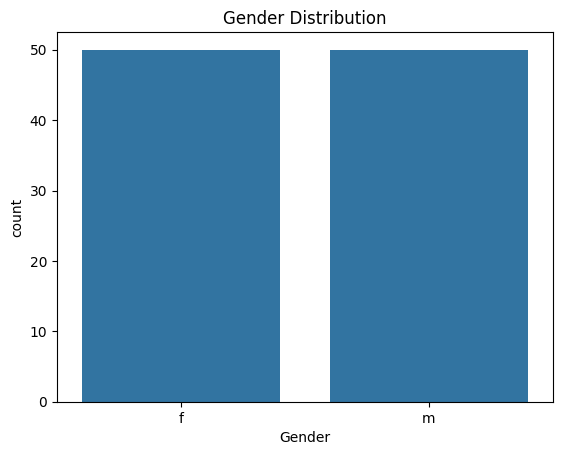

In [4]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


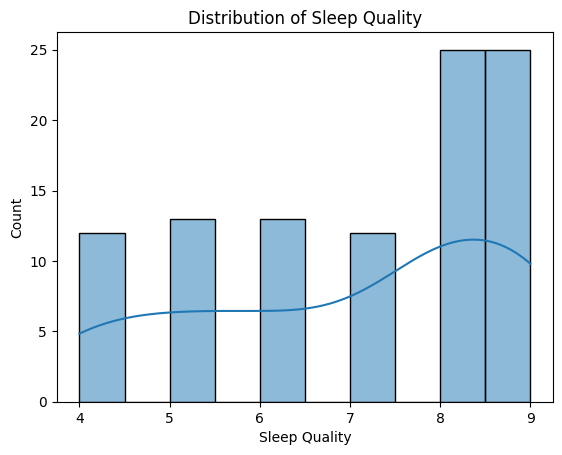

In [5]:
sns.histplot(df['Sleep Quality'], bins=10, kde=True)
plt.title('Distribution of Sleep Quality')
plt.show()


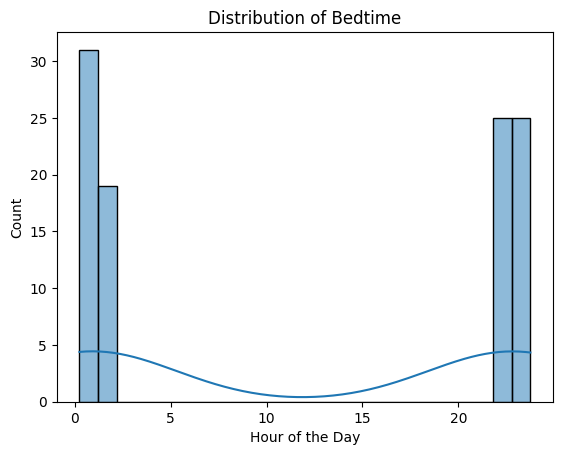

In [6]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M')
df['Bedtime Hour'] = df['Bedtime'].dt.hour + df['Bedtime'].dt.minute / 60
sns.histplot(df['Bedtime Hour'], bins=24, kde=True)
plt.title('Distribution of Bedtime')
plt.xlabel('Hour of the Day')
plt.show()


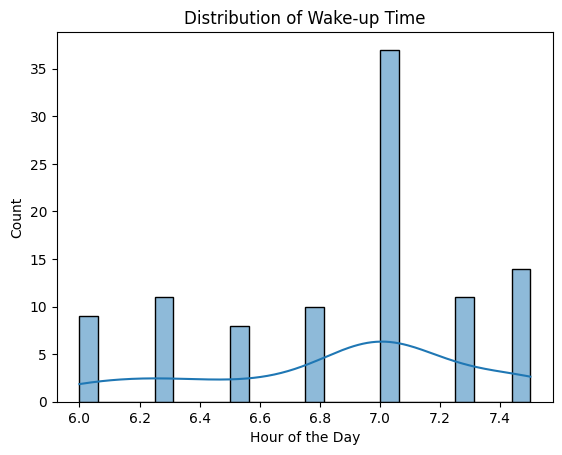

In [7]:
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%H:%M')
df['Wake-up Hour'] = df['Wake-up Time'].dt.hour + df['Wake-up Time'].dt.minute / 60
sns.histplot(df['Wake-up Hour'], bins=24, kde=True)
plt.title('Distribution of Wake-up Time')
plt.xlabel('Hour of the Day')
plt.show()


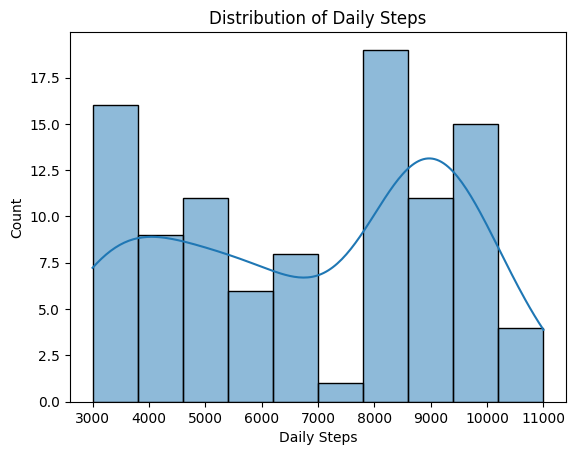

In [8]:
sns.histplot(df['Daily Steps'], bins=10, kde=True)
plt.title('Distribution of Daily Steps')
plt.show()


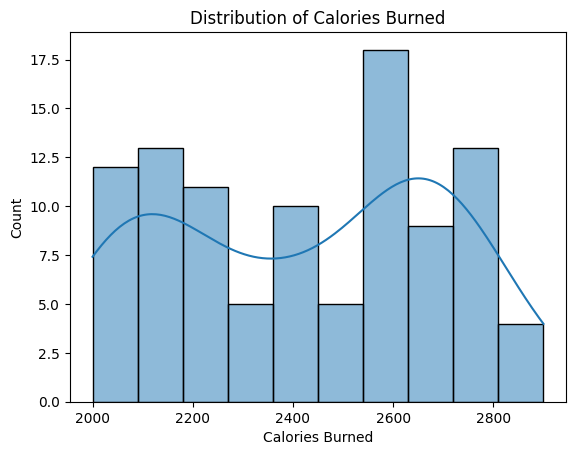

In [9]:
sns.histplot(df['Calories Burned'], bins=10, kde=True)
plt.title('Distribution of Calories Burned')
plt.show()


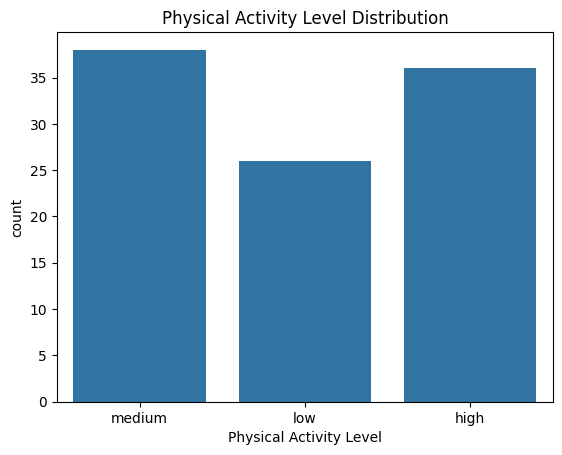

In [10]:
sns.countplot(x='Physical Activity Level', data=df)
plt.title('Physical Activity Level Distribution')
plt.show()


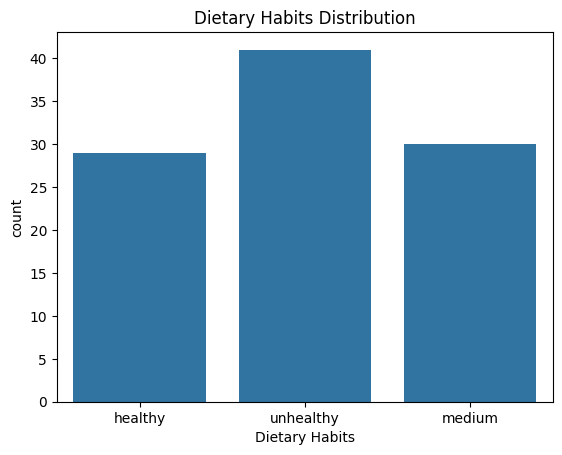

In [11]:
sns.countplot(x='Dietary Habits', data=df)
plt.title('Dietary Habits Distribution')
plt.show()


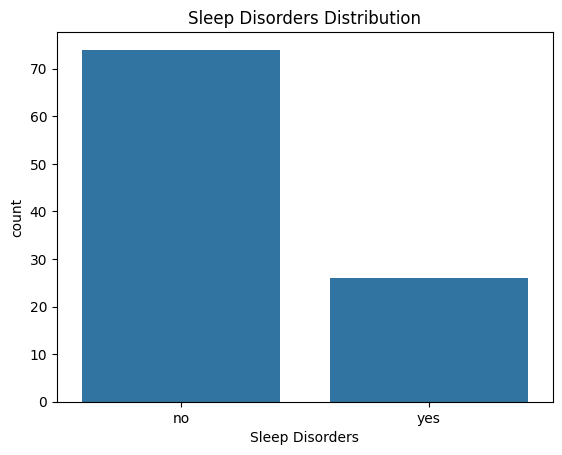

In [12]:
sns.countplot(x='Sleep Disorders', data=df)
plt.title('Sleep Disorders Distribution')
plt.show()


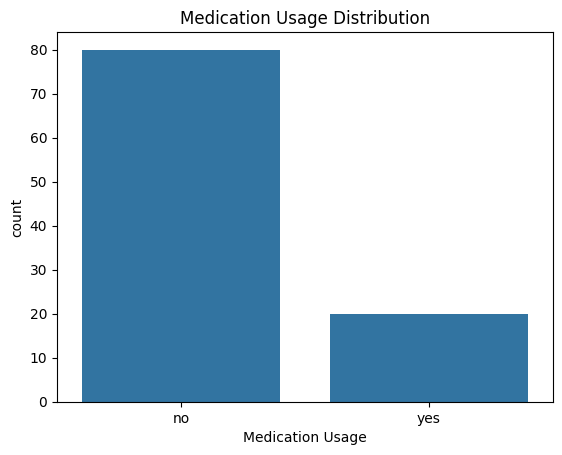

In [13]:
sns.countplot(x='Medication Usage', data=df)
plt.title('Medication Usage Distribution')
plt.show()


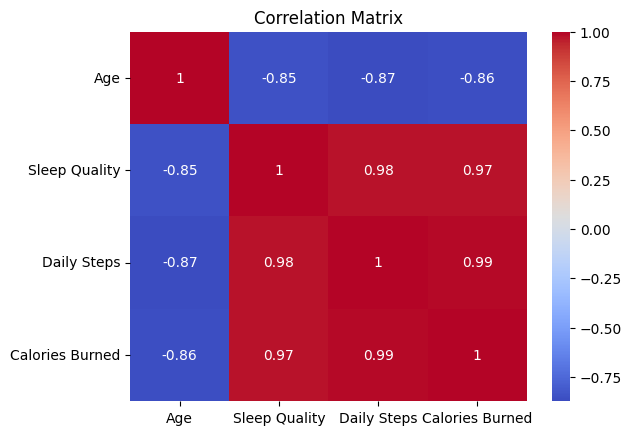

In [14]:
correlation_matrix = df[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


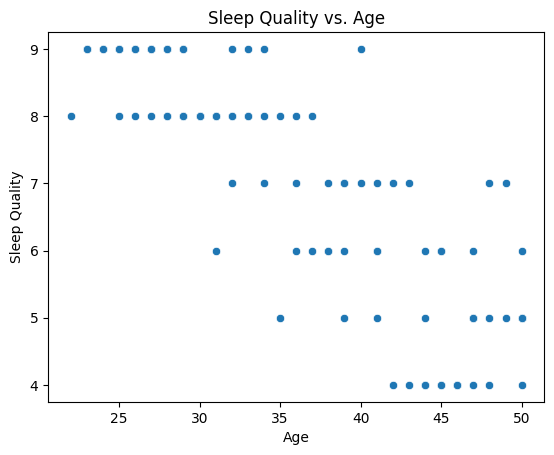

In [15]:
sns.scatterplot(x='Age', y='Sleep Quality', data=df)
plt.title('Sleep Quality vs. Age')
plt.show()


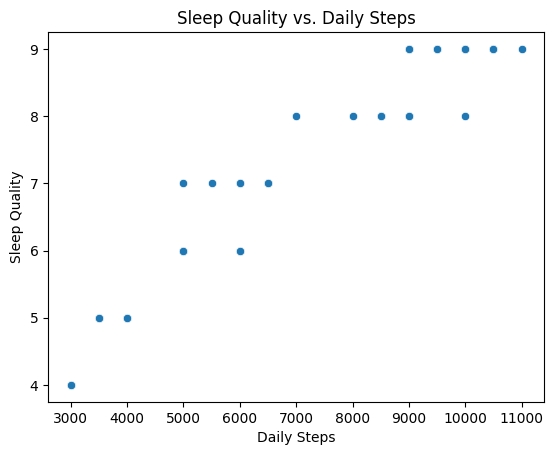

In [16]:
sns.scatterplot(x='Daily Steps', y='Sleep Quality', data=df)
plt.title('Sleep Quality vs. Daily Steps')
plt.show()


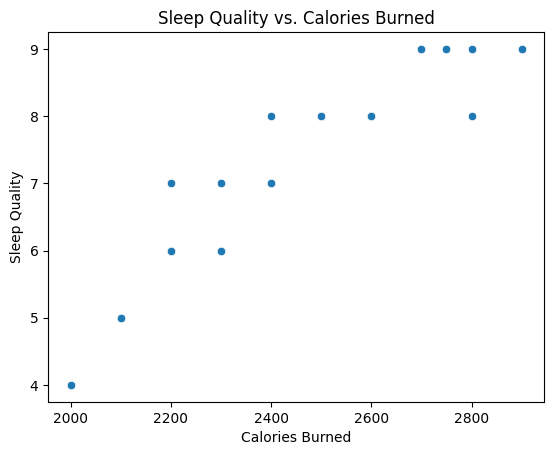

In [17]:
sns.scatterplot(x='Calories Burned', y='Sleep Quality', data=df)
plt.title('Sleep Quality vs. Calories Burned')
plt.show()


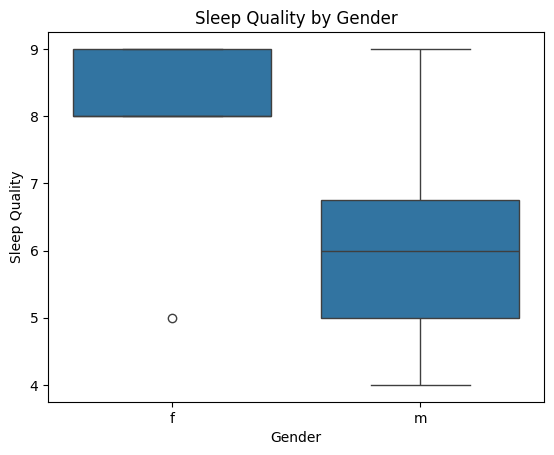

In [18]:
sns.boxplot(x='Gender', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Gender')
plt.show()


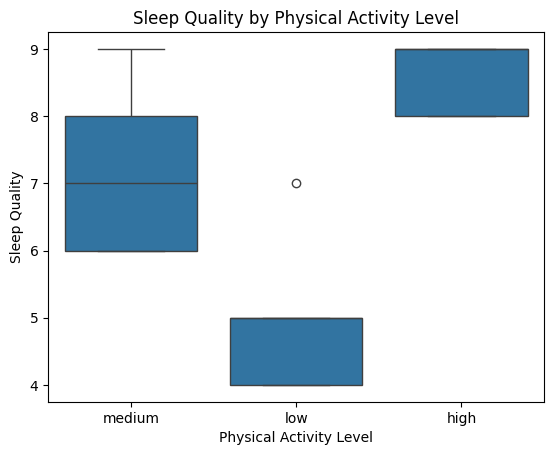

In [19]:
sns.boxplot(x='Physical Activity Level', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Physical Activity Level')
plt.show()


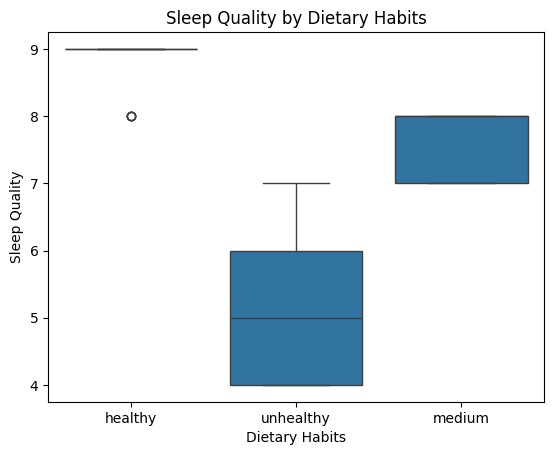

In [20]:
sns.boxplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Dietary Habits')
plt.show()


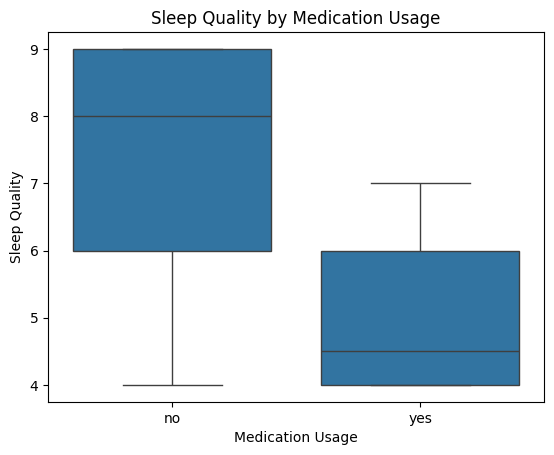

In [21]:
sns.boxplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Medication Usage')
plt.show()


# **Model**

In [22]:
categorical_features = ['Gender', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']
numeric_features = ['Age', 'Daily Steps', 'Calories Burned']

X = df[categorical_features + numeric_features]
y = df['Sleep Quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print("Model R^2 Score: ", model.score(X_test, y_test))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Model R^2 Score:  0.9577274939105904
Mean Absolute Error (MAE): 0.25126664889803163
Mean Squared Error (MSE): 0.1330527129164165


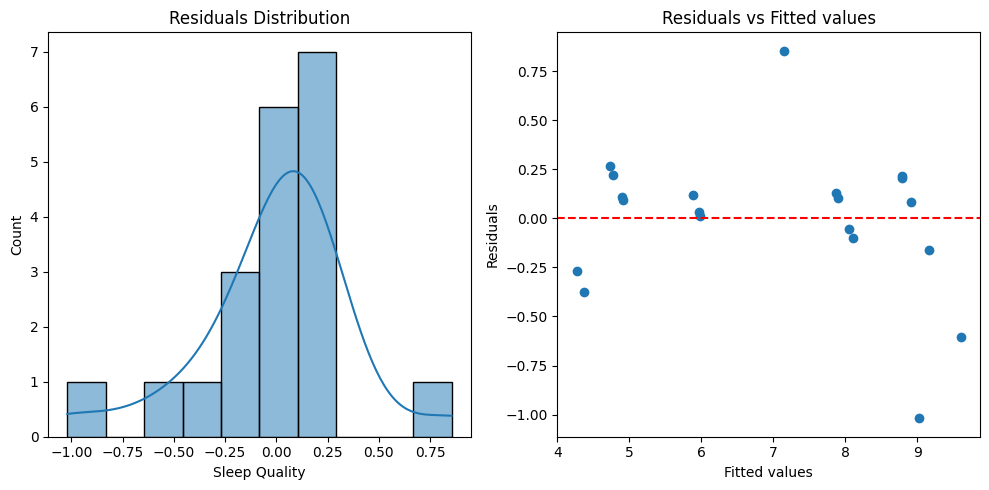

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [24]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average Cross-Validation R² Score: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.8767049  0.96026715 0.97659429 0.98608172 0.98599641]
Average Cross-Validation R² Score: 0.957128893617907
